In [2]:
import os
from pathlib import Path
import importlib
d = os.getcwd()
if d.endswith('testing'):
    d = os.path.split(d)[0]
    os.chdir(d)
import modules.helperFunctions.packDict as packDict
# from modules.helperFunctions.packDict import unpackDict
# from modules.helperFunctions.updateDict import updateDict
importlib.reload(packDict)
# d1 = unpackDict({'a':{'b':None},'b':[{'a':None},{'d':None}]})
# structure = {'configFiles':{'siteID':['siteConfiguration.yml',{'dataSourceID':'dataSourceConfiguration.yml'}]}}
structure = {'configFiles':{'siteID':{'':['siteConfiguration.yml'],'dataSourceID':['dataSourceConfiguration.yml']}}}

lout = []
for key,value in packDict.unpackDict(structure).items():
    if type(value) is not list:
        value = [value]
    for v in value:
        lout.append(os.path.join(key,v))
packDict.unpackDict(packDict.packDict(lout))

{'configFiles\\siteID\\siteConfiguration.yml': None,
 'configFiles\\siteID\\dataSourceID\\dataSourceConfiguration.yml': None}

,FCH4_mass,FCH4,FCH4_samples
count,583.000000,583.000000,872.000000
mean,54.290269,942.539386,17194.477064
std,26.041903,452.116369,3010.651685
min,-11.714234,-203.372125,0.000000
25%,36.276498,629.800313,17899.000000
50%,51.061356,886.481875,17999.000000
75%,69.604542,1208.412188,18000.000000
max,242.314704,4206.852500,18000.000000


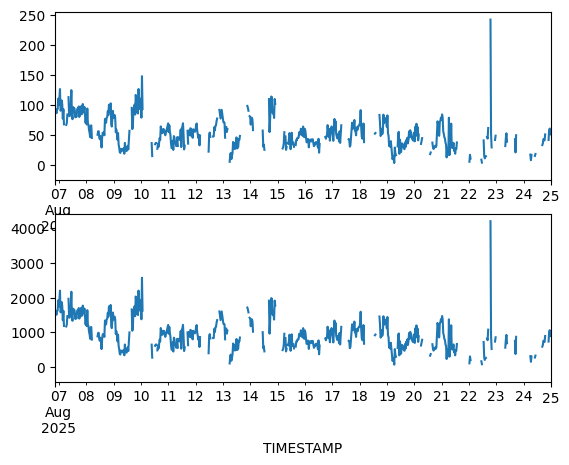

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = r"C:\Users\User\GSC_Work\SCL_2025\20250910_decompressed\TOA5_57840_Flux_CSFormat_24_2025_08_06_2030.dat"
# f = r"C:\Users\User\GSC_Work\SCL_2025\20250910_decompressed2\TOA5_57840_Flux_CSFormat_24_2025_08_08_1400.dat"
df = pd.read_csv(f,skiprows=[0],header=[0,1,2])
# (df['FCH4_mass','ngCH4 m-2 s-1'].astype(float)*1e-6*3600).median()
cols = df.columns
df.columns = [c[0] for c in cols]
df.index = pd.to_datetime(df['TIMESTAMP'])
df = df.drop(['TIMESTAMP','FP_EQUATION'],axis=1)
df = df.astype(float)
df.loc[((df['USTAR']<.15)|(df['FC_QC']>4)|(df['FCH4_samples']<17500)|(df['CO2_sig_strgth_Min']<.95)),['FCH4_mass','FC_mass']]=np.nan
# df.loc[,['FCH4_mass','FC_mass']]=np.nan
df['FCH4'] = df['FCH4_mass']/16
df['FCH4_mass'] *= 1e-6*3600
df['FC_mass'] *= 1e-3*3600
# df['CH4_density'] *= 16.04
# df.loc[df]
# df['']
fig,ax=plt.subplots(2)
df['FCH4_mass'].plot(ax=ax[0])
df['FCH4'].plot(ax=ax[1])
df[['FCH4_mass','FCH4','FCH4_samples']].describe()

np.float64(21.375030074399998)

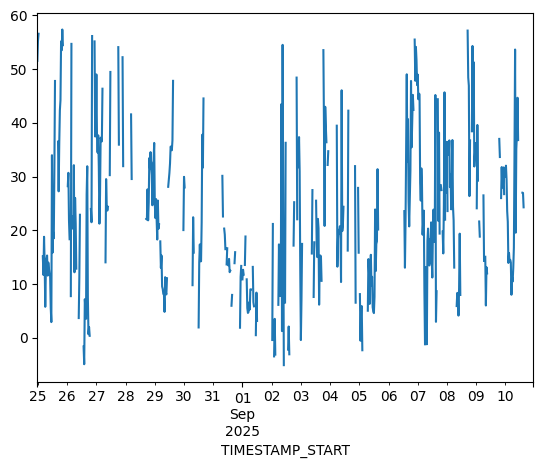

In [162]:
df = pd.read_csv(r'C:\Users\User\GSC_Work\SCL_2025\20250910\57840_Flux_AmeriFluxFormat_13.dat')
df.index = pd.to_datetime(df['TIMESTAMP_START'],format='%Y%m%d%H%M')
# df['TIMESTAMP_START']
df['FCH4']=df['FCH4'].astype('float')
df['FCH4_SSITC_TEST']=df['FCH4_SSITC_TEST'].astype('float')
df.loc[((df['FCH4_SSITC_TEST']>1)|(df['FCH4']>1000)|(df['FCH4']<-100)),'FCH4']=np.nan
df['FCH4']*=16.04*1e-6*3600
df['FCH4'].plot()
df['FCH4'].median()
# df['CO2_sig_strgth_Min'].describe()

In [3]:
import shutil
import modules.databaseSetup.configurations as configurations
importlib.reload(configurations)

projectPath=os.path.join(d,'testing','outputs','testProject')
shutil.rmtree(projectPath, ignore_errors=True)

pc = configurations.template(projectPath=projectPath)
# packDict.unpackDict(pc.structure)

Running: <class 'modules.databaseSetup.configurations.template'>

Saving: c:\Users\User\GSC_Work\EC_processing\testing\outputs\testProject\projectConfiguration.yml

{'startDate': {'datatype': 'datetime', 'description': 'Date of installation. For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'endDate': {'datatype': 'datetime', 'description': 'Date of removal (or None). For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'latitude': {'datatype': 'float', 'description': 'Latitude (WGS1984) Stored in decimal degrees.  Will parse input from other common format. For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'longitude': {'datatype': 'float', 'description': 'Longitude (WGS1984) Stored in decimal degrees.  Will parse input from other common format. For nested values, assumed to be same as parent object.

In [ ]:
class tst:
    def __init__(self):
        self.b = 'a'
        P = os.path.join('a','self.b','c')
        for p in p.split(os.path.sep)


['a', 'b', 'c']